In [114]:
import requests 
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
from pandas import DataFrame as df  

In [122]:
def find_avg_salary(URL_avg):
    r = requests.get (URL_avg)
    
    #get salary value
    soup = BeautifulSoup (r.text, 'html.parser')
    avg_salary = soup.find_all('div', attrs = { 'class' : "cmp-sal-summary cmp-float-left"})
    #print(avg_salary)
    avg_salary = avg_salary[0].find('div', attrs={'class': 'cmp-sal-salary'}).text.split()
    
    #get time and multiply value accordingly
    avg_time = avg_salary[2].lower()
    avg_value = float(avg_salary[0].replace("$","").replace(',', ''))
    if(avg_time == "year"):
        return avg_value
    if(avg_time == "month"):
        return avg_value*12
    if(avg_time == "week"):
        return avg_value*4*12


In [123]:
#Get Canada's average salary
URL_avg = "https://ca.indeed.com/salaries/Data-Scientist-Salaries"
avg_canada = find_avg_salary(URL_avg)

Ontario             108595.0
British-Columbia     86430.0
Alberta              67517.0
Québec-Province      79473.0
Saskatchewan         89088.0
Canada               97908.0
dtype: float64


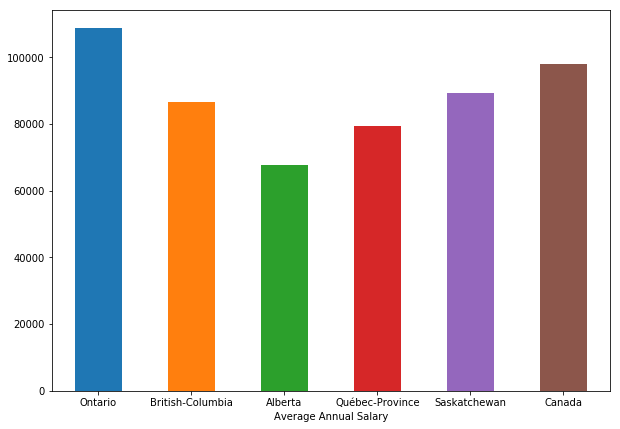

In [127]:
#Get average salary by province:
list_provinces = ["Ontario", "British-Columbia" ,"Alberta", "Québec-Province", "Saskatchewan"]
list_salaries = []
for province in list_provinces:
    url_province = "https://ca.indeed.com/salaries/Data-Scientist-Salaries,-" + province
    avg_salary = find_avg_salary(url_province)
    list_salaries.append(avg_salary)

list_provinces.append("Canada")
list_salaries.append(avg_canada)
provinces_salaries = pd.Series(list_salaries, index = list_provinces)
provinces_salaries.plot(kind='bar', stacked=False, rot = 0, figsize=(10, 7)).set_xlabel("Average Annual Salary") ;
print(provinces_salaries)    
